# Machine Learning Models To Predict Online Payment Fraud

### PURPOSE CLARIFICATION

The purpose of this machine learning model is to predict online payment fraud for Bossom Bank.

Fraud detection model is an important model to have in a banking industry to prevent scam, to boost the customers confidence 
and for the bank not to run at loss. There is need to identify fraud on time and to mitigate/eradicate it.

Bossom Bank been a multinational finance institute that offers retail and investment banking, pension management, 
asset management and payments services, with her headquarter in high density populated area(London) need to prevent fraud
in every of their customers transactions on time to avert loss of finance and customers dissatisfactions.

Building/Deploying machine model for this problem will help boost transparency, confidence and recoup lost income. 
It can also help in getting precise/accurate legitimate transaction or fraudulent transaction on time

## Data Dictionary

The below column reference;

• step represents a unit of time where 1 step equals 1
hour

• type type of online transaction

• amount the amount of the transaction

• nameOrig customer starting the transaction

• oldbalanceOrg balance before the transaction

• newbalanceOrig balance after the transaction

• nameDest recipient of the transaction

• oldbalanceDest initial balance of recipient
before the transaction

• newbalanceDest the new balance of the
recipient after the transaction

• isFraud fraud transaction

In [1]:
#import python libraries for data manipulation and visualization
import pandas as pd
import numpy as np


# other libraries....

#import pyplot and seaborn for visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# import datatime for datetime manipulations
from datetime import datetime as dt

In [2]:
# load the dataset

data = pd.read_csv(r"C:\Users\dell\Downloads\Online Payment Fraud Detection.csv")
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0


In [3]:
data.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0


In [4]:
data.shape

(1048575, 10)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 80.0+ MB


In [6]:
#Missing values

data.isnull()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
1048570,False,False,False,False,False,False,False,False,False,False
1048571,False,False,False,False,False,False,False,False,False,False
1048572,False,False,False,False,False,False,False,False,False,False
1048573,False,False,False,False,False,False,False,False,False,False


In [7]:
data.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

<AxesSubplot:title={'center':'visualizing the missing data in the dataset'}>

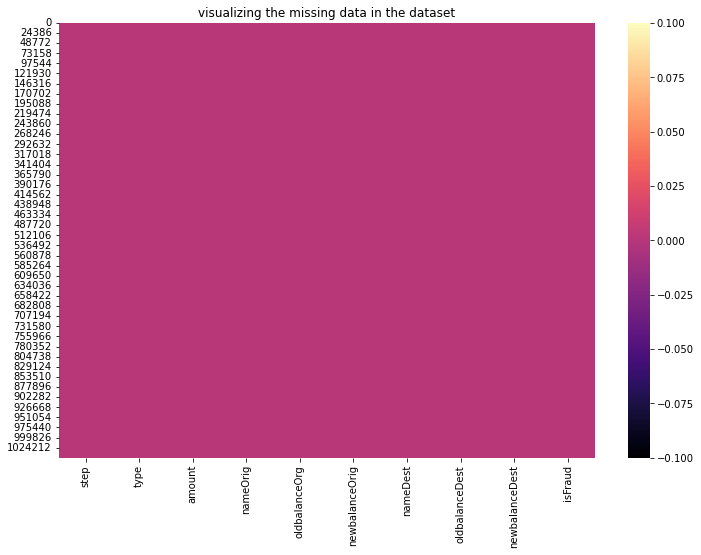

In [8]:
plt.figure(figsize = (12,8))
plt.title ("visualizing the missing data in the dataset")
sns.heatmap(data.isnull(), cbar =True, cmap= "magma")

In [9]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,2.696617e+01,1.586670e+05,8.740095e+05,8.938089e+05,9.781600e+05,1.114198e+06,1.089097e-03
std,1.562325e+01,2.649409e+05,2.971751e+06,3.008271e+06,2.296780e+06,2.416593e+06,3.298351e-02
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.500000e+01,1.214907e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+01,7.634333e+04,1.600200e+04,0.000000e+00,1.263772e+05,2.182604e+05,0.000000e+00
75%,3.900000e+01,2.137619e+05,1.366420e+05,1.746000e+05,9.159235e+05,1.149808e+06,0.000000e+00
max,9.500000e+01,1.000000e+07,3.890000e+07,3.890000e+07,4.210000e+07,4.220000e+07,1.000000e+00


In [10]:
data.describe().astype(int)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,1048575,1048575,1048575,1048575,1048575,1048575,1048575
mean,26,158666,874009,893808,978160,1114197,0
std,15,264940,2971750,3008271,2296780,2416593,0
min,1,0,0,0,0,0,0
25%,15,12149,0,0,0,0,0
50%,20,76343,16002,0,126377,218260,0
75%,39,213761,136642,174599,915923,1149807,0
max,95,10000000,38900000,38900000,42100000,42200000,1


In [11]:
data.type.unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [12]:
data.isFraud.unique()

array([0, 1], dtype=int64)

In [13]:
data.nameDest.unique()

array(['M1979787155', 'M2044282225', 'C553264065', ..., 'M1355182933',
       'M1964992463', 'M677577406'], dtype=object)

In [14]:
data.nameOrig.unique()

array(['C1231006815', 'C1666544295', 'C1305486145', ..., 'C2037964975',
       'C1633237354', 'C1264356443'], dtype=object)

In [15]:
data.amount.unique()

array([ 9839.64,  1864.28,   181.  , ...,  9917.36, 14140.05, 11450.03])

In [16]:
data.oldbalanceOrg.unique()

array([1.701360e+05, 2.124900e+04, 1.810000e+02, ..., 4.798030e+05,
       9.054500e+04, 8.058495e+04])

In [17]:
data.newbalanceOrig.unique()

array([160296.36,  19384.72,      0.  , ...,   6404.95,  80584.95,
        69134.92])

In [18]:
data.oldbalanceDest.unique()

array([      0.  ,   21182.  ,   41898.  , ...,  631284.08, 1847488.28,
        484329.37])

In [19]:
data.newbalanceDest.unique()

array([      0.  ,   40348.79,  157982.12, ...,  763671.32, 2127162.32,
        616886.72])

In [20]:
data.type.value_counts()

CASH_OUT    373641
PAYMENT     353873
CASH_IN     227130
TRANSFER     86753
DEBIT         7178
Name: type, dtype: int64

Text(0, 0.5, 'count')

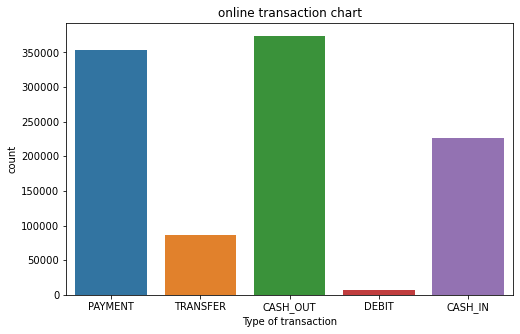

In [21]:
#visualize type of online transaction
plt.figure(figsize=(8,5))
sns.countplot (x="type", data= data)
plt.title ("online transaction chart")
plt.xlabel("Type of transaction")
plt.ylabel("count")

The Bank customers do more of payment and cash-out transactions while online debit is the least

In [22]:
#online transaction operations frequency

data.groupby('type').isFraud.count().sort_values(ascending=False)


type
CASH_OUT    373641
PAYMENT     353873
CASH_IN     227130
TRANSFER     86753
DEBIT         7178
Name: isFraud, dtype: int64

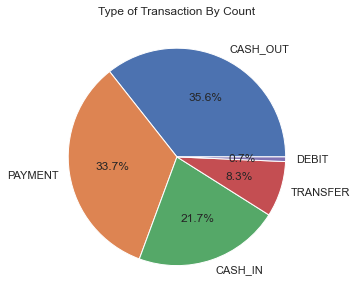

In [23]:
#using pie chart to visualize the type of transactions

#checking the ratio using a piechart for the highest fraud on the payment type
sns.set_theme(font_scale=1)

plt.figure(figsize=(8,5))
plt.pie(data.groupby('type').isFraud.count().sort_values(ascending=False),labels=data.groupby('type')
        .isFraud.count().sort_values(ascending=False).index, autopct="%.1f%%")

plt.title('Type of Transaction By Count',
             loc ='center', )
plt.show()


In [24]:
data.isFraud.value_counts()

0    1047433
1       1142
Name: isFraud, dtype: int64

from isFraud column, there are 1047433 none-fraud transaction and 1142 fraud transactions

In [25]:
 label=data.groupby('isFraud').type.count().sort_values(ascending=True)
 label   
    

isFraud
1       1142
0    1047433
Name: type, dtype: int64

<AxesSubplot:title={'center':'Fraudulent Transactions'}, ylabel='fraud_transaction_label'>

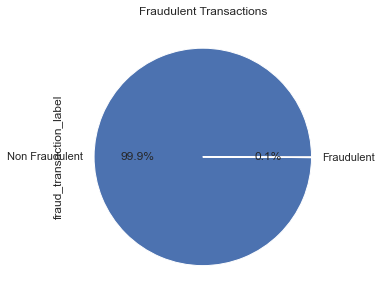

In [26]:
# create a function that properly labels isFraud

def Fraud (x):
    if x ==1:
        return "Fraudulent"
    else:
        return "Non Fraudulent"
    
# create a new column
data["fraud_transaction_label"] = data["isFraud"].apply(Fraud)


# create visualization
plt.figure(figsize = (10,5))
plt.title ("Fraudulent Transactions")
data.fraud_transaction_label.value_counts().plot.pie(autopct='%1.1f%%')

### In pie chart view, 99.9% of the transactions are non fraudulent while 0.1% are fraudulent

Text(0, 0.5, 'Count numbers')

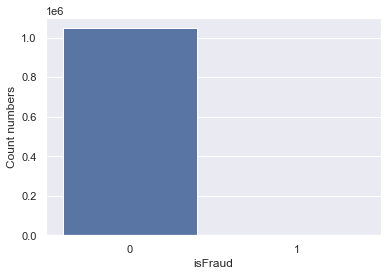

In [27]:
sns.countplot(x='isFraud', data=data)
plt.xlabel('isFraud')
plt.ylabel('Count numbers')


In [28]:
data.nameOrig.value_counts()

C1214450722    2
C309111136     2
C1268675361    2
C720460198     2
C1109092856    2
              ..
C560131732     1
C455251560     1
C650578540     1
C1883668225    1
C1264356443    1
Name: nameOrig, Length: 1048317, dtype: int64

<AxesSubplot:title={'center':"Barplot of 'type' against 'isFraud'"}, xlabel='type', ylabel='isFraud'>

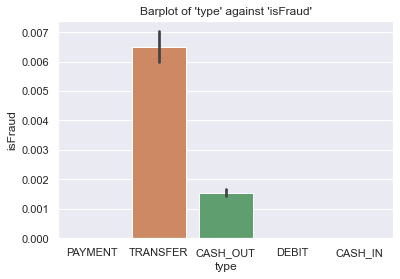

In [30]:
# visualizing type of transactions against isFraud(The Area where fraudulent transactions were discovered)

plt.title("Barplot of 'type' against 'isFraud'",
             loc ='center', )
sns.barplot(x=data.type, y=data.isFraud)


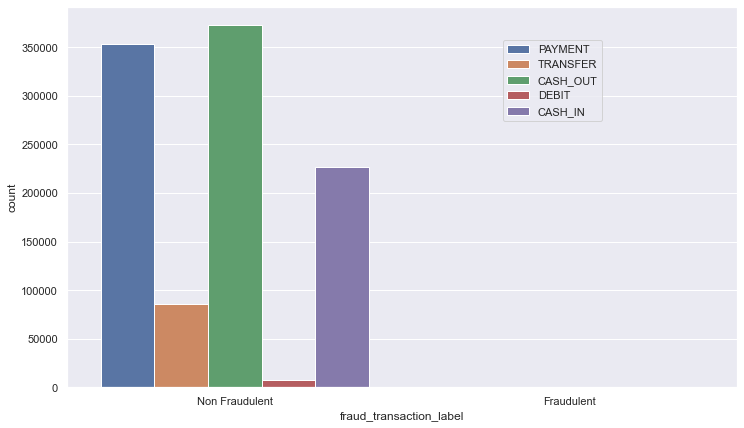

In [31]:
# Visualization between type and isfraud_label

plt.figure(figsize=(12,7))
sns.countplot(x='fraud_transaction_label',data=data,hue='type')
plt.legend(loc=[0.65,0.7])


#### Fraudulent Transactions were discovered in Transfer and cash-out


<AxesSubplot:xlabel='type', ylabel='step'>

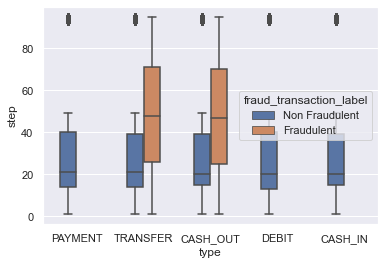

In [32]:
# Visualizing relationship btw step,type and isFraud_label

sns.boxplot(x= "type", y= "step", hue ="fraud_transaction_label", data= data, width=0.5)

Text(0.5, 1.0, 'Correlation between Columns')

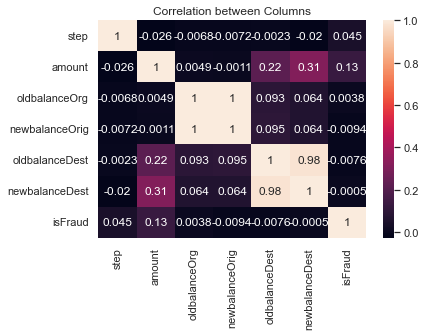

In [33]:
corel = data.corr()
sns.heatmap(corel,annot=True)
plt.title('Correlation between Columns')

# One Hot Encode

In [34]:
categorical =  ["type"]

In [35]:
categories_dumies = pd.get_dummies(data[categorical])

In [36]:
categories_dumies.head()

,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,0,1
3,0,1,0,0,0
4,0,0,0,1,0


In [37]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,fraud_transaction_label
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,Non Fraudulent
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,Non Fraudulent
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,Fraudulent
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,Fraudulent
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,Non Fraudulent


In [38]:
# Use concat to merge the one-Hot encode with the real data table
data = pd.concat([data,categories_dumies],axis=1)
print (data.shape)

(1048575, 16)


In [39]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,fraud_transaction_label,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,Non Fraudulent,0,0,0,1,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,Non Fraudulent,0,0,0,1,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,Fraudulent,0,0,0,0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,Fraudulent,0,1,0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,Non Fraudulent,0,0,0,1,0


In [40]:
data= data.drop(categorical, axis=1)


In [41]:
data.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,fraud_transaction_label,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,Non Fraudulent,0,0,0,1,0
1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,Non Fraudulent,0,0,0,1,0
2,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,Fraudulent,0,0,0,0,1
3,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,Fraudulent,0,1,0,0,0
4,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,Non Fraudulent,0,0,0,1,0


In [42]:
data.shape

(1048575, 15)

# Modelling

## Select Target

In [43]:
y = data.isFraud

In [44]:

X = data.drop(["isFraud", "nameOrig", "nameDest", "fraud_transaction_label"], axis = 1)
X.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,1,0


In [45]:
y.head(5)

0    0
1    0
2    1
3    1
4    0
Name: isFraud, dtype: int64

## Select Features

### Train - Test Split

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3)

In [48]:
X_train.shape, y_train.shape

((734002, 11), (734002,))

In [49]:
X_test.shape, y_test.shape

((314573, 11), (314573,))

## Importing and initializing ML Algorithm

In [50]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [51]:
LR = LogisticRegression()

In [52]:
RF = RandomForestClassifier()

In [53]:
models = [LR,RF]

In [54]:
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.3)

In [55]:
#create function to train a model and evaluate accuracy

def trainer(model,X_train,y_train,X_valid,y_valid):
    
    #fit your model
    model.fit(X_train,y_train)
    
    #predict on the fitted model
    prediction = model.predict(X_valid)
    
    #print evaluation metric
    print('\nFor {}, Accuracy score is {} \n'.format(model.__class__.__name__,accuracy_score(prediction,y_test)))
    #print(classification_report(prediction,y_valid)) #use this later
    

In [56]:
for model in models:
    trainer(model,X_train,y_train,X_valid,y_valid)


For LogisticRegression, Accuracy score is 0.9982325247239909 


For RandomForestClassifier, Accuracy score is 0.9979654960851694 



#### The 2 models used behaved well and gives an accuracy of approximately 100%. The difference between the 2 models is  0.0003. LogisticRegression has an higher accuracy of .0003 above RandomForest

## Feature Importance

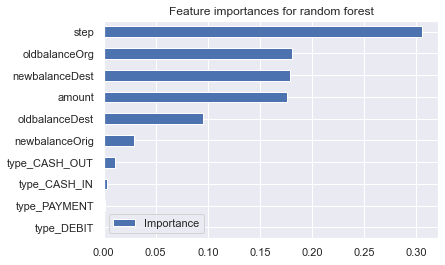

In [57]:
RF_importances = pd.DataFrame(data = RF.feature_importances_,index = X_valid.columns, columns=['Importance'])
RF_importances[:10].sort_values(by='Importance').plot.barh()
plt.title('Feature importances for random forest')
plt.show()

In [58]:
RF_importances[:10].sort_values(by='Importance').index.values

array(['type_DEBIT', 'type_PAYMENT', 'type_CASH_IN', 'type_CASH_OUT',
       'newbalanceOrig', 'oldbalanceDest', 'amount', 'newbalanceDest',
       'oldbalanceOrg', 'step'], dtype=object)

## Using Feature Importance to Train and Test our models

In [59]:
X_train2 = X_train[['type_DEBIT', 'type_PAYMENT', 'type_CASH_IN', 'type_CASH_OUT',
       'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'amount',
       'oldbalanceOrg', 'step']]
X_train2.head(5)

,type_DEBIT,type_PAYMENT,type_CASH_IN,type_CASH_OUT,newbalanceOrig,oldbalanceDest,newbalanceDest,amount,oldbalanceOrg,step
727675,0,0,1,0,2710199.24,371502.19,336412.78,35089.40,2675109.84,37
393105,0,1,0,0,30052.76,0.00,0.00,5301.24,35354.00,18
386151,0,0,0,1,0.00,85071.92,165737.10,80665.19,11143.00,17
538978,1,0,0,0,190320.14,1185464.25,1189048.11,3583.86,193904.00,21
200155,0,0,0,0,0.00,3880064.06,4419607.65,539543.59,19116.19,13


In [60]:
X_valid2 = X_valid[['type_DEBIT', 'type_PAYMENT', 'type_CASH_IN', 'type_CASH_OUT',
       'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'amount',
       'oldbalanceOrg', 'step']]

In [61]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
RF.fit(X_train2,y_train)
pred2 = RF.predict(X_valid2)

In [62]:
RF.fit(X_train2,y_train)
pred2 = RF.predict(X_valid2)

print(accuracy_score(pred2,y_valid))

0.9997425080982792


From the important features of the Randon Forest Model analysed above, it can be infered that the top 4 important features are:
From the 10 important features of the dataset, 6 are much more important to detect or trace fraud
They are;
1. Step: This is shows the decision or step taken to prevent the fraud. if reports are made on time then fraud can be stopped 

2. OldbalanceOrg: This is the customer balance before the transaction takes place. There should be a hold on an account that suspicious transaction(s) move out from till the transaction source is confirmed 
   
3. NewbalanceOrig: This is the new balance of the customer after the transaction.

4. NewbalDest: This is the recipient new balance after the transaction.There should be a hold on an account that suspicious transaction(s) move into till the transaction source is confirmed 
   
5. OldbalanceDest: This is the recipient old balance before the transaction.

6. Amount: This is the value of the transaction. There should be a flagged when an unusual amount is move in or out of an account until the transaction is confirmed
  

In [63]:
# Precision score

p_positive = precision_score(pred2, y_valid, pos_label=1)
print(p_positive)

p_negative = precision_score(pred2, y_valid, pos_label=0)
print(p_negative)

0.791005291005291
0.9999936345263292


In [64]:
# recall score

r_positive = recall_score(pred2, y_valid, pos_label=1)
print(r_positive)

r_negative = recall_score(pred2, y_valid, pos_label=0)
print(r_negative)

0.9933554817275747
0.9997486253945627


## Evaluation and Cross-Validation

In [65]:
# Model cross-validation using k-fold
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression

cv = KFold(n_splits=10, random_state=1, shuffle=True)

In [66]:
def trainer_mcv(model,X,y):
    #evaluate model
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    # report performance
    print('Accuracy: %.3f' % (mean(scores)))

In [67]:
# train and predict
for model in models:
    trainer_mcv(model,X_train2,y_train)

Accuracy: 0.999
Accuracy: 1.000


In [68]:
# Generate the classification report


print(classification_report(pred2, y_valid))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314272
           1       0.79      0.99      0.88       301

    accuracy                           1.00    314573
   macro avg       0.90      1.00      0.94    314573
weighted avg       1.00      1.00      1.00    314573



## Summary/Conclusion

The 2 models used for this machine learning Algorithm performed very well. They both maintained an accuracy score of 99% which is a strong score

While testing Further precision and recall were used and the results were excellent. Evaluation and Cross-Validation(cv) also confirm the durability of both models(LR AND RF) with 99% and 100% accuracy.  
Nevertheless RandomForest having 100% accuracy in cross validation should be deployed for production.

The feature Importance has helped the bank on area to focus on in other to prevent/avert fraudulent transactions

Thank you